In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
!pip install wordcloud
from wordcloud import WordCloud

In [2]:
#loading case data
case_data = pd.read_csv('time_series_covid19_confirmed_US.csv')
#loading death data
death_data = pd.read_csv('time_series_covid19_deaths_US.csv')
#loading county data
data = pd.read_csv('abridged_couties.csv')
#finding that some numbers and variables are by state vs others vary by county
april_data = pd.read_csv('4.18states.csv')


In [3]:
#all columns within counties dataframe
print(data.shape)
data.columns

(3244, 87)


Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [4]:
#find counties per state 
by_state = data.groupby('StateName').count()
by_state

,countyFIPS,STATEFP,COUNTYFP,CountyName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,CensusRegionName,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
StateName,,,,,,,,,,,,,,,,,,,,,
AK,32,29,29,32,0,0,0,29,29,32,...,29,29,29,29,29,29,29,16,16,16
AL,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,55,55,55
AR,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,46,46,46
AS,5,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,5,5
AZ,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,0,0,0
CA,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,3,3,3
CO,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,40,40,40
CT,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,0,0,0
DC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0


In [5]:
# show number of counties per state
state_county_count= data.groupby('StateName').count()[['CountyName']]
state_county_count

,CountyName
StateName,
AK,32
AL,67
AR,75
AS,5
AZ,15
CA,58
CO,64
CT,8
DC,1


In [6]:
#join death and counties data
death_joined = data.join(death_data, lsuffix='StateName', rsuffix='Province_State')
death_joined

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,0,0,0,0,0,0,0,0,0,0
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,4,4,5,5,5,5,5,5,5,5
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,2,2,2,2,2,2,2,2,2,2
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,33,39,42,44,45,45,51,56,58,60
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,1,1,1,1,1,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,15005,15.0,5.0,Kalawao,HI,NaN,NaN,NaN,21.188495,-156.979972,...,0,0,0,0,0,0,0,0,0,0
3240,72039,72.0,39.0,Ciales Municipio,PR,NaN,NaN,NaN,18.314399,-66.494215,...,40,40,53,60,60,77,77,84,115,134
3241,72069,72.0,69.0,Humacao Municipio,PR,NaN,NaN,NaN,18.144804,-65.817109,...,0,0,0,0,0,0,0,0,0,0
3242,City1,NaN,NaN,New York City,NY,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#create table that just contains State Names and their deaths per county per date 

death_plot = death_joined.set_index('StateName').groupby('StateName').sum().drop(['STATEFP',
 'COUNTYFP',
 'lat',
 'lon',
 'POP_LATITUDE',
 'POP_LONGITUDE',
 'Rural-UrbanContinuumCode2013',
 'PopulationEstimate2018',
 'PopTotalMale2017',
 'PopTotalFemale2017',
 'FracMale2017',
 'PopulationEstimate65+2017',
 'PopulationDensityperSqMile2010',
 'CensusPopulation2010',
 'MedianAge2010',
 '#EligibleforMedicare2018',
 'MedicareEnrollment,AgedTot2017',
 '3-YrDiabetes2015-17',
 'DiabetesPercentage',
 'HeartDiseaseMortality',
 'StrokeMortality',
 'Smokers_Percentage',
 'RespMortalityRate2014',
 '#FTEHospitalTotal2017',
 "TotalM.D.'s,TotNon-FedandFed2017",
 '#HospParticipatinginNetwork2017',
 '#Hospitals',
 '#ICU_beds',
 'dem_to_rep_ratio',
 'PopMale<52010',
 'PopFmle<52010',
 'PopMale5-92010',
 'PopFmle5-92010',
 'PopMale10-142010',
 'PopFmle10-142010',
 'PopMale15-192010',
 'PopFmle15-192010',
 'PopMale20-242010',
 'PopFmle20-242010',
 'PopMale25-292010',
 'PopFmle25-292010',
 'PopMale30-342010',
 'PopFmle30-342010',
 'PopMale35-442010',
 'PopFmle35-442010',
 'PopMale45-542010',
 'PopFmle45-542010',
 'PopMale55-592010',
 'PopFmle55-592010',
 'PopMale60-642010',
 'PopFmle60-642010',
 'PopMale65-742010',
 'PopFmle65-742010',
 'PopMale75-842010',
 'PopFmle75-842010',
 'PopMale>842010',
 'PopFmle>842010',
 '3-YrMortalityAge<1Year2015-17',
 '3-YrMortalityAge1-4Years2015-17',
 '3-YrMortalityAge5-14Years2015-17',
 '3-YrMortalityAge15-24Years2015-17',
 '3-YrMortalityAge25-34Years2015-17',
 '3-YrMortalityAge35-44Years2015-17',
 '3-YrMortalityAge45-54Years2015-17',
 '3-YrMortalityAge55-64Years2015-17',
 '3-YrMortalityAge65-74Years2015-17',
 '3-YrMortalityAge75-84Years2015-17',
 '3-YrMortalityAge85+Years2015-17',
 'mortality2015-17Estimated',
 'stay at home',
 '>50 gatherings',
 '>500 gatherings',
 'public schools',
 'restaurant dine-in',
 'entertainment/gym',
 'federal guidelines',
 'foreign travel ban',
 'SVIPercentile',
 'HPSAShortage',
 'HPSAServedPop',
 'HPSAUnderservedPop',
 'UID',
 'code3',
 'FIPS',
 'Lat',
 'Long_',
 'Population'], axis = 1)
death_plot = death_plot.T
#list(death_plot.columns)
death_plot = death_plot.iloc[50:]
death_plot = death_plot.set_index(pd.to_datetime(death_plot.index))
death_plot

StateName,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
2020-03-12,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,31,0,0,0
2020-03-13,0,0,0,0,0,4,1,0,0,0,...,0,0,0,0,0,0,37,0,0,0
2020-03-14,0,0,0,0,0,3,0,0,0,0,...,0,0,0,1,0,0,39,0,0,0
2020-03-15,0,0,0,0,0,5,1,0,0,0,...,0,0,0,1,0,0,40,0,0,0
2020-03-16,0,0,0,0,0,7,1,0,0,0,...,0,0,0,2,0,0,48,0,0,0
2020-03-17,0,0,0,0,0,12,1,1,0,0,...,0,1,0,2,0,0,55,0,0,0
2020-03-18,0,0,0,0,0,16,1,1,0,1,...,0,3,0,2,0,0,67,0,0,0
2020-03-19,0,0,0,0,0,18,3,1,0,3,...,0,5,0,3,4,0,73,4,0,0
2020-03-20,0,0,0,0,0,24,3,1,0,4,...,1,4,0,3,6,1,82,3,1,0
2020-03-21,0,1,0,0,1,25,5,1,0,4,...,1,5,0,4,0,1,92,4,2,0


In [8]:
#gives states with most deaths per date 
list(death_plot.idxmax(axis=1))
#over time leaders: AK, WA, NY overall for deaths 

['WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY']

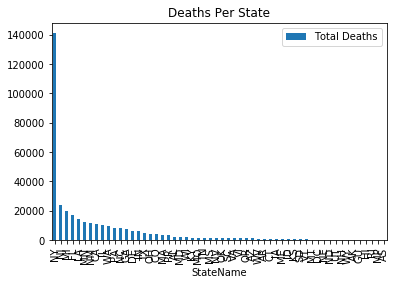

In [9]:
#creating data frame to show count of deaths per state
count_death_per_state = pd.DataFrame(death_plot.sum())
count_death_per_state = count_death_per_state.rename(columns = {0: 'Total Deaths'})

count_death_per_state = count_death_per_state.sort_values(by = 'Total Deaths', ascending = False)

count_dps = count_death_per_state.reset_index()
count_dps.plot(x='StateName', y=['Total Deaths'], kind="bar", title = "Deaths Per State")



Text(0, 0.5, 'Death Count')

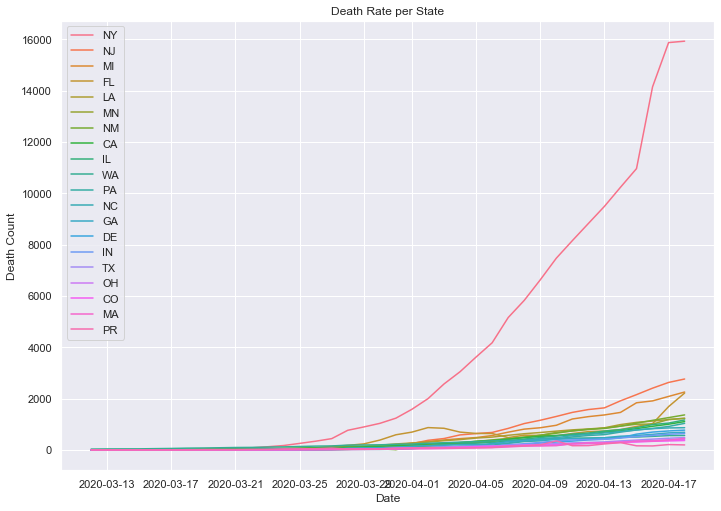

In [10]:
#line plot showing top 20 leading states in death count and the death rate over time 
top_20_states = count_death_per_state[:20]
column_names_top_20 = top_20_states.index.tolist()
death_plot = death_plot[column_names_top_20]
sns.set(rc={'figure.figsize':(11.7, 8.27)})
plot1 = sns.lineplot(data = death_plot, dashes = False)
plot1.set_title('Death Rate per State')
plot1.set_xlabel('Date')
plot1.set_ylabel('Death Count')

In [11]:
case_joined = data.join(case_data, lsuffix='StateName', rsuffix='Province_State')
#case_joined
#list(case_joined.columns)


#create table that just contains State Names and their confirmed cases per county per date 

case_plot = case_joined.set_index('StateName').groupby('StateName').sum()
#list(case_plot)

case_plot = case_joined.set_index('StateName').groupby('StateName').sum().drop(['STATEFP',
 'COUNTYFP',
 'lat',
 'lon',
 'POP_LATITUDE',
 'POP_LONGITUDE',
 'Rural-UrbanContinuumCode2013',
 'PopulationEstimate2018',
 'PopTotalMale2017',
 'PopTotalFemale2017',
 'FracMale2017',
 'PopulationEstimate65+2017',
 'PopulationDensityperSqMile2010',
 'CensusPopulation2010',
 'MedianAge2010',
 '#EligibleforMedicare2018',
 'MedicareEnrollment,AgedTot2017',
 '3-YrDiabetes2015-17',
 'DiabetesPercentage',
 'HeartDiseaseMortality',
 'StrokeMortality',
 'Smokers_Percentage',
 'RespMortalityRate2014',
 '#FTEHospitalTotal2017',
 "TotalM.D.'s,TotNon-FedandFed2017",
 '#HospParticipatinginNetwork2017',
 '#Hospitals',
 '#ICU_beds',
 'dem_to_rep_ratio',
 'PopMale<52010',
 'PopFmle<52010',
 'PopMale5-92010',
 'PopFmle5-92010',
 'PopMale10-142010',
 'PopFmle10-142010',
 'PopMale15-192010',
 'PopFmle15-192010',
 'PopMale20-242010',
 'PopFmle20-242010',
 'PopMale25-292010',
 'PopFmle25-292010',
 'PopMale30-342010',
 'PopFmle30-342010',
 'PopMale35-442010',
 'PopFmle35-442010',
 'PopMale45-542010',
 'PopFmle45-542010',
 'PopMale55-592010',
 'PopFmle55-592010',
 'PopMale60-642010',
 'PopFmle60-642010',
 'PopMale65-742010',
 'PopFmle65-742010',
 'PopMale75-842010',
 'PopFmle75-842010',
 'PopMale>842010',
 'PopFmle>842010',
 '3-YrMortalityAge<1Year2015-17',
 '3-YrMortalityAge1-4Years2015-17',
 '3-YrMortalityAge5-14Years2015-17',
 '3-YrMortalityAge15-24Years2015-17',
 '3-YrMortalityAge25-34Years2015-17',
 '3-YrMortalityAge35-44Years2015-17',
 '3-YrMortalityAge45-54Years2015-17',
 '3-YrMortalityAge55-64Years2015-17',
 '3-YrMortalityAge65-74Years2015-17',
 '3-YrMortalityAge75-84Years2015-17',
 '3-YrMortalityAge85+Years2015-17',
 'mortality2015-17Estimated',
 'stay at home',
 '>50 gatherings',
 '>500 gatherings',
 'public schools',
 'restaurant dine-in',
 'entertainment/gym',
 'federal guidelines',
 'foreign travel ban',
 'SVIPercentile',
 'HPSAShortage',
 'HPSAServedPop',
 'HPSAUnderservedPop',
 'UID',
 'code3',
 'FIPS',
 'Lat',
 'Long_'], axis = 1)
case_plot = case_plot.T

case_plot


StateName,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/26/20,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/14/20,536,4818,2690,75,2451,24748,7595,967,355,9043,...,4939,15505,1513,5986,1703,1487,9757,3320,1526,468
4/15/20,553,4986,2811,77,2551,25974,7707,967,379,9540,...,4941,16406,1620,6329,1194,1511,9979,3471,1615,487
4/16/20,573,5312,2974,79,2715,26913,8020,1045,394,10210,...,5436,17378,1722,6717,1050,1559,10166,3621,1685,502
4/17/20,713,5541,3150,82,2885,28366,8427,1089,422,10730,...,5295,18350,1801,7310,819,1606,10546,3791,1760,520


In [12]:
case_plot = case_plot.iloc[40:]
case_plot
case_plot = case_plot.set_index(pd.to_datetime(case_plot.index))

In [13]:
#gives states with most cases per date 
list(case_plot.idxmax(axis=1))
#leaders: WA, IL, CA, WA, NY

['CA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'WA',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY',
 'NY']

Text(0, 0.5, 'Case Count')

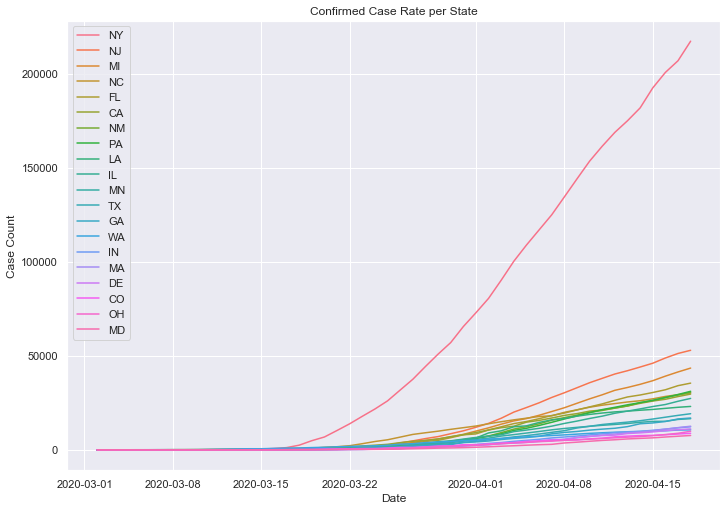

In [14]:
#line plot showing all states and they case rate over time 
count_cases_per_state = pd.DataFrame(case_plot.sum())
count_cases_per_state = count_cases_per_state.rename(columns = {0: 'Total Deaths'})

count_cases_per_state = count_cases_per_state.sort_values(by = 'Total Deaths', ascending = False)
top_20_states_cases = count_cases_per_state[:20]
column_names_top_20_cases = top_20_states_cases.index.tolist()
column_names_top_20_cases
case_plot = case_plot[column_names_top_20_cases]
#case_plot
plot2 = sns.lineplot(data = case_plot, dashes = False)
plot2.set_title('Confirmed Case Rate per State')
plot2.set_xlabel('Date')
plot2.set_ylabel('Case Count')

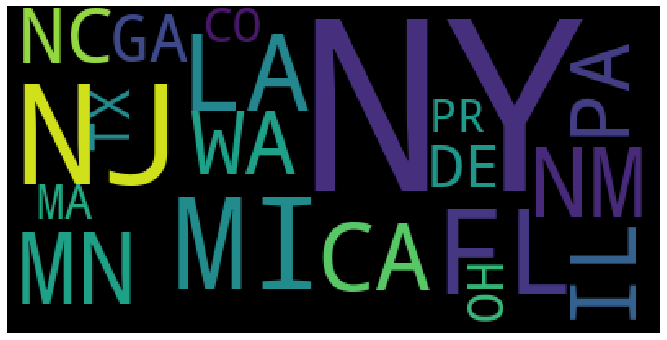

In [15]:
#Word Cloud for Death Prevalence per State

deaths_per_state = list(death_plot.sum(axis=0))
state_names_deaths  = []
death_count = 0

for i in range(len(death_plot.columns)): 
    for j in range(deaths_per_state[death_count]):
        state_names_deaths.append(death_plot.columns[i])
    death_count = death_count + 1 
state_names_deaths

words = ' '.join(list(state_names_deaths))
wordcloud = WordCloud(collocations = False).generate(words)


plt.imshow(wordcloud)
plt.axis('off')


plt.show()

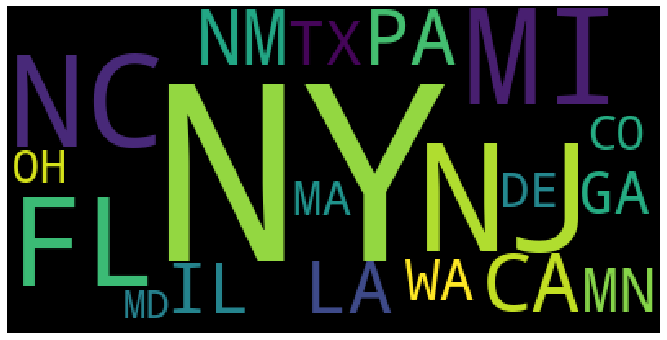

In [16]:
#Word Cloud showing prevalence of total cases 

cases_per_state = list(case_plot.sum(axis=0))
state_names_cases  = []
cases_count = 0

for i in range(len(case_plot.columns)): 
    for j in range(cases_per_state[cases_count]):
        state_names_cases.append(case_plot.columns[i])
    cases_count = cases_count + 1 
state_names_cases

words = ' '.join(list(state_names_cases))
wordcloud = WordCloud(collocations = False).generate(words)


plt.imshow(wordcloud)
plt.axis('off')


plt.show()

In [17]:
#getting population per state 
pop_state = data.groupby('StateName').sum()[['PopulationEstimate2018']]
pop_state

,PopulationEstimate2018
StateName,
AK,737438.0
AL,4887871.0
AR,3013825.0
AS,0.0
AZ,7171646.0
CA,39557045.0
CO,5695564.0
CT,3572665.0
DC,702455.0


In [18]:
death_per_state = pd.DataFrame(death_plot.sum(axis=0)).rename(columns={0:'Death_Count'})
death_per_state

,Death_Count
StateName,
NY,141141
NJ,24119
MI,19838
FL,17130
LA,14035
MN,12028
NM,11747
CA,11112
IL,10275


Text(0, 0.5, 'Death Count')

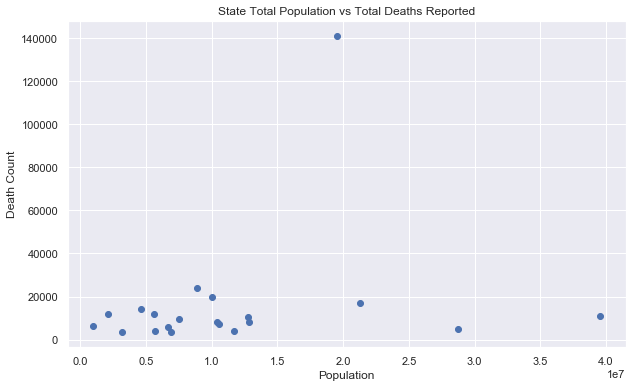

In [19]:
#population per state data scatter versus total deaths 
pop_state['Deaths']= death_per_state['Death_Count']
pop_state_vs_death = pop_state 

pop_state_vs_death

plt.figure(figsize=(10, 6))
plt.scatter(pop_state_vs_death['PopulationEstimate2018'],pop_state_vs_death['Deaths'] )

plt.title('State Total Population vs Total Deaths Reported')
plt.xlabel('Population')
plt.ylabel('Death Count')


Text(0.5, 0, '# of People Ages 60+ per County')

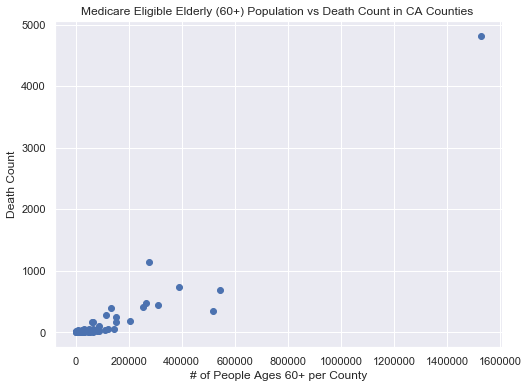

In [20]:
#within california and maybe do some other states 

#join on counties in california 

#graphing medicare eligible population to find correlation between seniors and death rates

county_old = data[data['StateName'] == 'CA'][['CountyName','#EligibleforMedicare2018']]


death_per_county = pd.DataFrame(death_data[death_data['Province_State'] == 'California'].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis = 1).sum(axis = 1))
death_per_county['County_Name'] = death_data[death_data['Province_State'] == 'California'][['Admin2']]
death_per_county = death_per_county.rename(columns = {0: 'Deaths'})
#death_per_county = death_per_county.iloc[:2] #2 counties misc not in other table for pop
county_old = county_old.reset_index(drop=True)
death_per_county = death_per_county.reset_index(drop = True)

death_vs_old = county_old.join(death_per_county, lsuffix='CountyName', rsuffix='County_Name').drop(columns=['County_Name'])
death_vs_old

plt.figure(figsize=(8, 6))
plt.scatter(death_vs_old['#EligibleforMedicare2018'], death_vs_old['Deaths'])
plt.title('Medicare Eligible Elderly (60+) Population vs Death Count in CA Counties ')
plt.ylabel('Death Count')
plt.xlabel('# of People Ages 60+ per County')



In [21]:
#choosing NC because they have almost full data in HPSA category
#finding counties and hpsa underserved pop in each

NC_county_HPSA = data[data['StateName'] == 'NC'][['CountyName','HPSAUnderservedPop']]
NC_county_HPSA = NC_county_HPSA.dropna()
NC_county_HPSA = NC_county_HPSA.reset_index(drop=True)
NC_county_HPSA

,CountyName,HPSAUnderservedPop
0,Alamance,10524.0
1,Alexander,5644.0
2,Alleghany,3873.0
3,Anson,15049.0
4,Ashe,4262.0
...,...,...
77,Washington,3342.0
78,Wayne,16414.0
79,Wilkes,15622.0
80,Wilson,7690.0


In [22]:
#finding deaths per county in NC 
NC_death_per_county = pd.DataFrame(death_data[death_data['Province_State'] == 'North Carolina'].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis = 1).sum(axis = 1))
NC_death_per_county['County_Name'] = death_data[death_data['Province_State'] == 'North Carolina'][['Admin2']]
NC_death_per_county = NC_death_per_county.rename(columns = {0: 'Deaths'})
NC_death_per_county = NC_death_per_county.reset_index(drop=True)
NC_death_per_county

,Deaths,County_Name
0,0,Alamance
1,0,Alexander
2,0,Alleghany
3,0,Anson
4,0,Ashe
...,...,...
97,38,Wilson
98,5,Yadkin
99,0,Yancey
100,0,Out of NC


In [23]:
#combining tables to graph hpsa vs deaths per county
NC_HPSA_death = NC_death_per_county.join(NC_county_HPSA, lsuffix='County_Name', rsuffix='CountyName').drop(['CountyName'], axis = 1).dropna()
NC_HPSA_death

,Deaths,County_Name,HPSAUnderservedPop
0,0,Alamance,10524.0
1,0,Alexander,5644.0
2,0,Alleghany,3873.0
3,0,Anson,15049.0
4,0,Ashe,4262.0
...,...,...,...
77,2,Robeson,3342.0
78,27,Rockingham,16414.0
79,66,Rowan,15622.0
80,15,Rutherford,7690.0


Text(0.5, 0, 'Underserved Health Population')

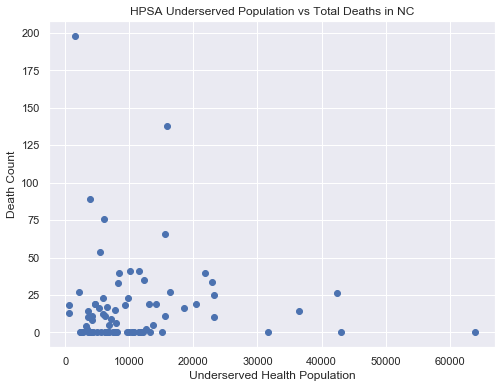

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(NC_HPSA_death['HPSAUnderservedPop'], NC_HPSA_death['Deaths'])
plt.title('HPSA Underserved Population vs Total Deaths in NC')
plt.ylabel('Death Count')
plt.xlabel('Underserved Health Population')

In [25]:
#exploring CA hospital counts versus CA death counts 
hospital_county = data[data['StateName'] == 'CA'][['CountyName','#Hospitals']]
hospital_county = hospital_county.dropna()
hospital_county = hospital_county.reset_index(drop=True)
#hospital_county
#getting hospitals per county and death count per county
hospital_death_CA = hospital_county.join(death_per_county, lsuffix='CountyName', rsuffix='County_Name').drop(columns=['County_Name'])
hospital_death_CA

,CountyName,#Hospitals,Deaths
0,Alameda,12.0,414
1,Alpine,0.0,0
2,Amador,1.0,0
3,Butte,4.0,0
4,Calaveras,1.0,0
5,Colusa,1.0,0
6,Contra Costa,7.0,189
7,Del Norte,1.0,0
8,El Dorado,2.0,0
9,Fresno,7.0,62


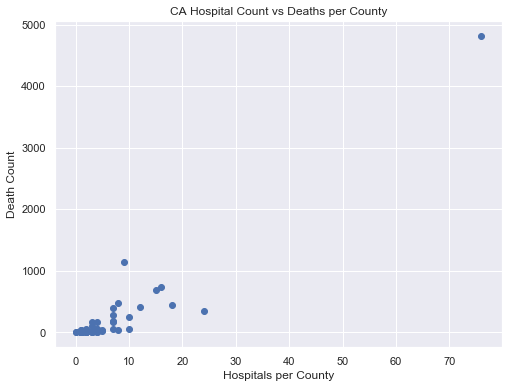

In [26]:
plt.figure(figsize=(8, 6))
plt.title('CA Hospital Count vs Deaths per County')
plt.ylabel('Death Count')
plt.xlabel('Hospitals per County')
plt.scatter(hospital_death_CA['#Hospitals'], hospital_death_CA['Deaths'])

In [27]:
smokers_county = data[data['StateName'] == 'CA'][['CountyName','Smokers_Percentage']]
smokers_county = smokers_county.reset_index(drop=True)
smokers_county

,CountyName,Smokers_Percentage
0,Alameda,9.732710
1,Alpine,14.455124
2,Amador,10.832190
3,Butte,13.768327
4,Calaveras,10.951936
5,Colusa,12.217256
6,Contra Costa,9.940587
7,Del Norte,15.132245
8,El Dorado,11.220361
9,Fresno,13.358908


In [28]:
cases_per_county = pd.DataFrame(case_data[case_data['Province_State'] == 'California'].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis = 1).sum(axis = 1))
cases_per_county['County_Name'] = case_data[case_data['Province_State'] == 'California'][['Admin2']]
cases_per_county = cases_per_county.rename(columns = {0: 'Cases'})
cases_per_county = cases_per_county.reset_index(drop = True)
cases_per_county= cases_per_county.drop([58, 59])
cases_per_county

,Cases,County_Name
0,15259,Alameda
1,26,Alpine
2,105,Amador
3,274,Butte
4,169,Calaveras
5,48,Colusa
6,10301,Contra Costa
7,31,Del Norte
8,572,El Dorado
9,3381,Fresno


In [29]:
smoker_vs_case = smokers_county.join(cases_per_county, lsuffix='CountyName', rsuffix='County_Name')
smoker_vs_case = smoker_vs_case.drop(['CountyName'], axis = 1)
smoker_vs_case

,Smokers_Percentage,Cases,County_Name
0,9.732710,15259,Alameda
1,14.455124,26,Alpine
2,10.832190,105,Amador
3,13.768327,274,Butte
4,10.951936,169,Calaveras
5,12.217256,48,Colusa
6,9.940587,10301,Contra Costa
7,15.132245,31,Del Norte
8,11.220361,572,El Dorado
9,13.358908,3381,Fresno


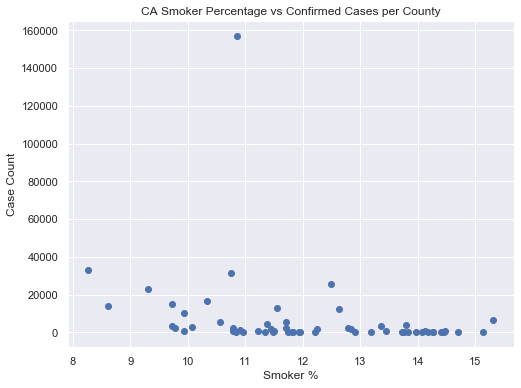

In [30]:
plt.figure(figsize=(8, 6))
plt.title('CA Smoker Percentage vs Confirmed Cases per County')
plt.ylabel('Case Count')
plt.xlabel('Smoker %')

plt.scatter(smoker_vs_case['Smokers_Percentage'],smoker_vs_case['Cases'])

In [31]:
#pulling US data from april dataset
US_data = april_data[april_data['Country_Region']== 'US'][:-1]
US_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780
5,California,US,2020-04-18 22:32:47,36.1162,-119.6816,30491,1140,NaN,29351.0,6.0,77.766063,251614.0,4892.0,3.738808,84000006,USA,641.731334,16.044079
6,Colorado,US,2020-04-18 22:32:47,39.0598,-105.3111,9047,389,NaN,8658.0,8.0,159.648818,43307.0,1755.0,4.299768,84000008,USA,764.221442,19.398696
7,Connecticut,US,2020-04-18 22:32:47,41.5978,-72.7554,17550,1086,NaN,16464.0,9.0,492.246487,55462.0,1946.0,6.188034,84000009,USA,1555.611091,11.088319
8,Delaware,US,2020-04-18 22:32:47,39.3185,-75.5071,2538,67,423.0,2471.0,10.0,260.638101,14017.0,224.0,2.639874,84000010,USA,1439.465825,8.825847
9,Diamond Princess,US,2020-04-18 22:32:47,NaN,NaN,49,0,0.0,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


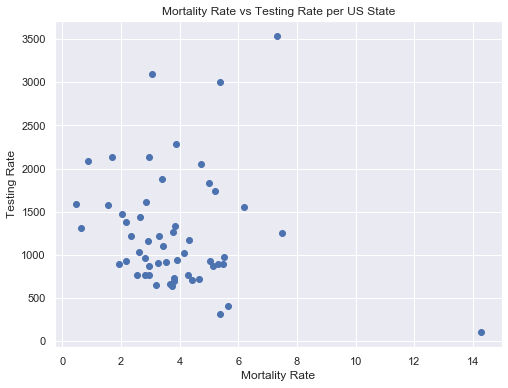

In [32]:

plt.figure(figsize=(8, 6))
plt.title('Mortality Rate vs Testing Rate per US State')
plt.ylabel('Testing Rate')
plt.xlabel('Mortality Rate')

plt.scatter(US_data['Mortality_Rate'], US_data['Testing_Rate'])

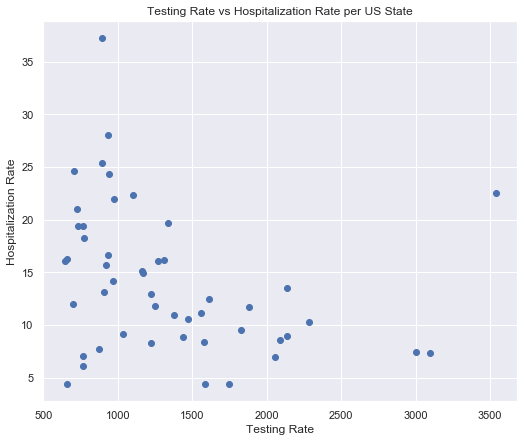

In [33]:
plt.figure(figsize=(8.5, 7))
plt.title('Testing Rate vs Hospitalization Rate per US State')
plt.xlabel('Testing Rate')
plt.ylabel('Hospitalization Rate')


plt.scatter(US_data['Testing_Rate'], US_data['Hospitalization_Rate'])

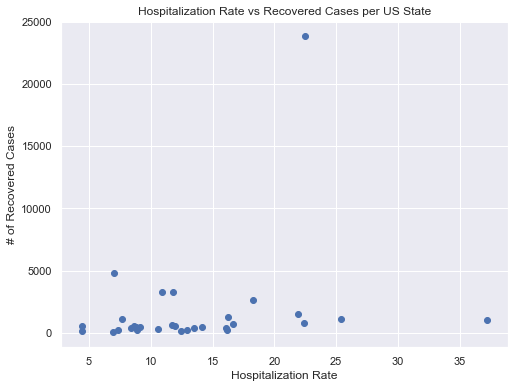

In [34]:
plt.figure(figsize=(8, 6))
plt.title('Hospitalization Rate vs Recovered Cases per US State')
plt.ylabel('# of Recovered Cases')
plt.xlabel('Hospitalization Rate')

plt.scatter(US_data['Hospitalization_Rate'], US_data['Recovered'])

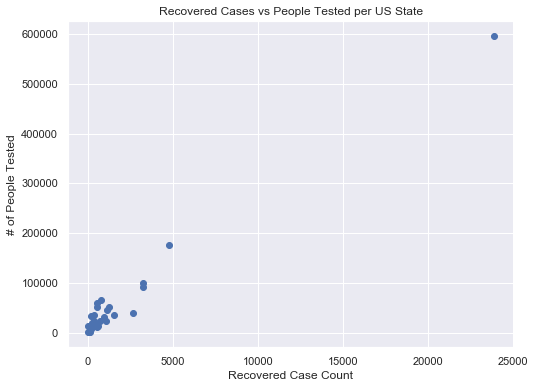

In [35]:
plt.figure(figsize=(8, 6))
plt.title('Recovered Cases vs People Tested per US State')
plt.ylabel('# of People Tested')
plt.xlabel('Recovered Case Count')

plt.scatter(US_data['Recovered'], US_data['People_Tested'])

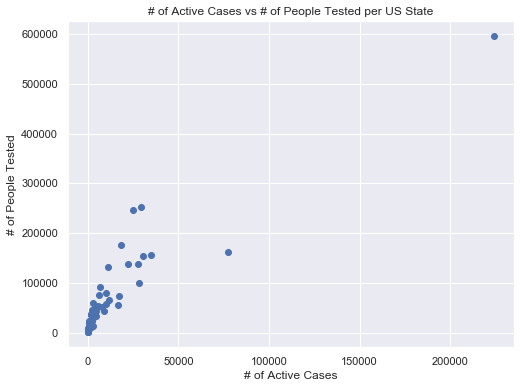

In [36]:
plt.figure(figsize=(8, 6))
plt.title('# of Active Cases vs # of People Tested per US State')
plt.ylabel('# of People Tested')
plt.xlabel('# of Active Cases')

plt.scatter(US_data['Active'], US_data['People_Tested'])

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression


from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt



from sklearn.model_selection import train_test_split



# Linear Regression CV 

## Received help from following links

linear regression, hypothesis test: https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

optional hw: https://data100.datahub.berkeley.edu/user/anniepang/notebooks/sp20/hw/optional_hw/optional_hw.ipynb

https://towardsdatascience.com/how-to-measure-the-goodness-of-a-regression-model-60c7f87614ce

https://www.statisticssolutions.com/conduct-interpret-linear-regression/

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

k fold CV: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
 
https://datascience.stackexchange.com/questions/9159/when-to-choose-linear-regression-or-decision-tree-or-random-forest-regression

https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6

## Data Cleaning

In [38]:
states_4_18 = pd.read_csv('4.18states.csv')

#Only US data
states_4_18 = states_4_18.loc[states_4_18['Country_Region'] == 'US']

#Removed states/regions/places with too many NANs
states_4_18 = states_4_18[states_4_18.Province_State != 'Diamond Princess']
states_4_18

states_4_18 = states_4_18[states_4_18.Province_State != 'Grand Princess']
states_4_18

states_4_18 = states_4_18[states_4_18.Province_State != 'American Samoa']
states_4_18

states_4_18 = states_4_18[states_4_18.Province_State != 'Nebraska']
states_4_18

states_4_18 = states_4_18[states_4_18.Province_State != 'Nevada']
states_4_18

states_4_18 = states_4_18[states_4_18.Province_State != 'Northern Mariana Islands']
states_4_18

states_4_18 = states_4_18[states_4_18.Province_State != 'Puerto Rico']
states_4_18

states_4_18 = states_4_18[states_4_18.Province_State != 'Recovered']
states_4_18

states_4_18 = states_4_18[states_4_18.Province_State != 'Virgin Islands']
states_4_18


#Since Recovered has too many NANs, saved a copy of without Recovered
#Actually can see what influence the number of recovered cases has on the mortality rate
#Because included active and death cases

#Deleted Active
states_4_18_dropped_recovered = states_4_18.drop('Recovered', 1)
states_4_18_dropped_recovered
states_4_18_dropped_recovered = states_4_18_dropped_recovered.drop('FIPS', 1)
states_4_18_dropped_recovered
states_4_18_dropped_recovered = states_4_18_dropped_recovered.drop('UID', 1)
states_4_18_dropped_recovered
states_4_18_dropped_recovered = states_4_18_dropped_recovered.drop('Lat', 1)
states_4_18_dropped_recovered
states_4_18_dropped_recovered = states_4_18_dropped_recovered.drop('Long_', 1)
states_4_18_dropped_recovered
states_4_18_dropped_recovered = states_4_18_dropped_recovered.drop('Last_Update', 1)
states_4_18_dropped_recovered
states_4_18_dropped_recovered = states_4_18_dropped_recovered.drop('ISO3', 1)
states_4_18_dropped_recovered

with_active_df = states_4_18_dropped_recovered
with_active_df = with_active_df.fillna(with_active_df.mean())

states_4_18_dropped_recovered = states_4_18_dropped_recovered.drop('Active', 1)
states_4_18_dropped_recovered
#Filled the remaining NANs with the mean of the column
states_4_18_dropped_recovered = states_4_18_dropped_recovered.fillna(states_4_18_dropped_recovered.mean())
states_4_18_dropped_recovered.head()

,Province_State,Country_Region,Confirmed,Deaths,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,US,4712,153,100.492717,42538.0,620.0,3.247029,907.206961,13.157895
1,Alaska,US,314,9,52.530410,9655.0,39.0,2.866242,1615.226458,12.420382
3,Arizona,US,4724,180,64.901548,51045.0,566.0,3.810330,701.291175,11.981372
4,Arkansas,US,1744,38,67.361213,24141.0,291.0,2.178899,932.435235,16.685780
5,California,US,30491,1140,77.766063,251614.0,4892.0,3.738808,641.731334,16.044079


# Spliting Testing and Training data

# Simple Linear Regression with 1 dependent variable
### Experimenting and Testing with variables first (failed models)

 
### The Number of People Hospitalized VS. The Number of Confirmed Cases 

coefficient of determination: 0.426068549498719


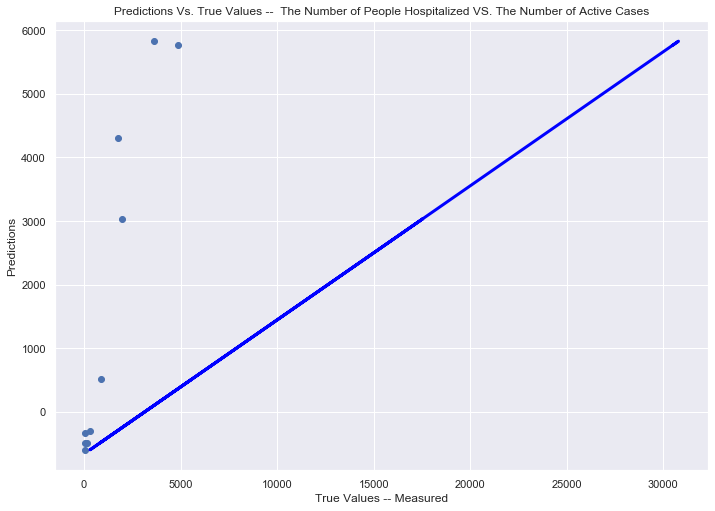

In [39]:


x = states_4_18_dropped_recovered.Confirmed.values.reshape(-1,1)

y = states_4_18_dropped_recovered.People_Hospitalized

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()


lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)


plt.scatter(y_test, predictions)
plt.plot(x_test, predictions, color='blue', linewidth=3)

plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values --  The Number of People Hospitalized VS. The Number of Active Cases')

r_sq = model.score(x_test, y_test)

print('coefficient of determination:', r_sq)


### The number of death cases VS. The number of confirmed cases

coefficient of determination: 0.4305351790554551


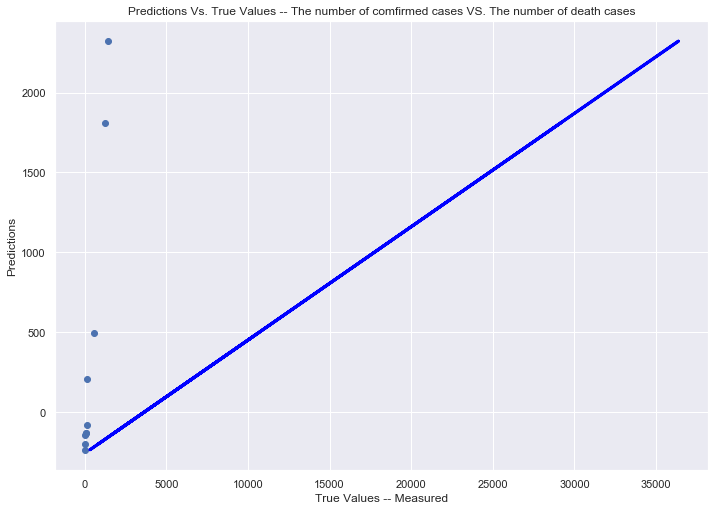

In [40]:


x = states_4_18_dropped_recovered.Confirmed.values.reshape(-1,1)

y = states_4_18_dropped_recovered.Deaths

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
plt.scatter(y_test, predictions)
plt.plot(x_test, predictions, color='blue', linewidth=3)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- The number of comfirmed cases VS. The number of death cases')

r_sq = model.score(x_test, y_test)

print('coefficient of determination:', r_sq)

### The Number of People_Tested VS. The Number of Death Cases

coefficient of determination: 0.4286210094587445


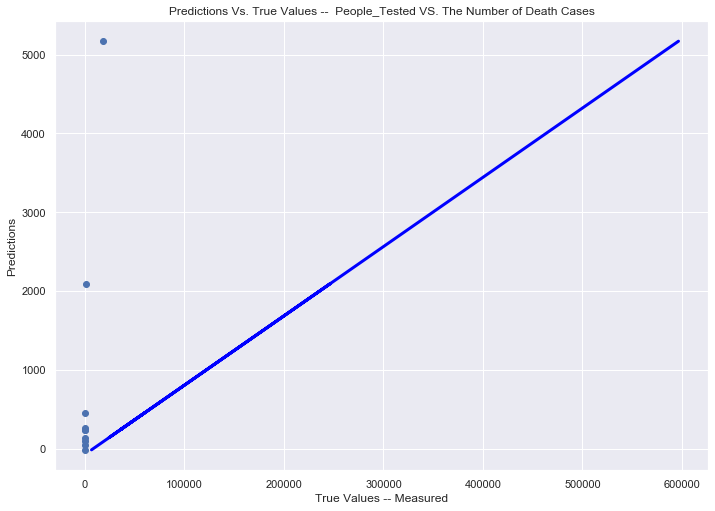

In [41]:

x = states_4_18_dropped_recovered.People_Tested.values.reshape(-1,1)

y = states_4_18_dropped_recovered.Deaths

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)


plt.scatter(y_test, predictions)
plt.plot(x_test, predictions, color='blue', linewidth=3)

plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values --  People_Tested VS. The Number of Death Cases')

r_sq = model.score(x_test, y_test)

print('coefficient of determination:', r_sq)



# Multiple Linear Regression
### Experimenting and Testing (failed models)

### People_Hospitalized + Testing_Rate VS. Death Cases

coefficient of determination: 0.7512870469851327


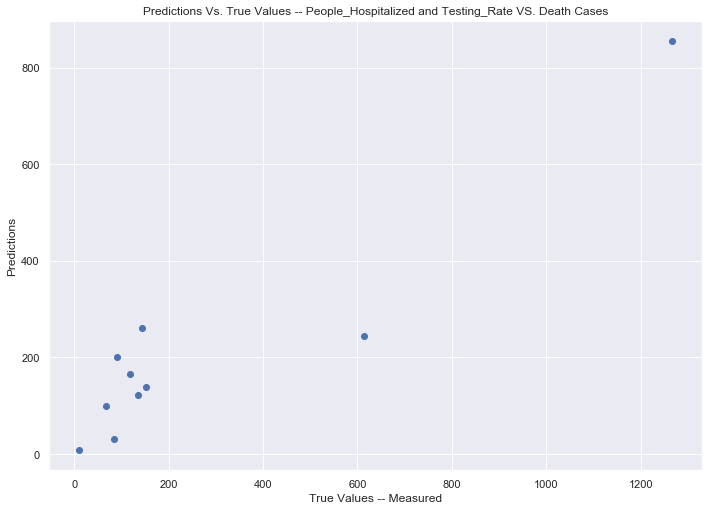

In [42]:
x = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate']].to_numpy()

y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

plt.scatter(y_test, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- People_Hospitalized and Testing_Rate VS. Death Cases')

r_sq = model.score(x_test, y_test)

print('coefficient of determination:', r_sq)


### Deaths VS. Testing Rate + The Number of Confirmed Cases 

coefficient of determination: 0.7829876438589874


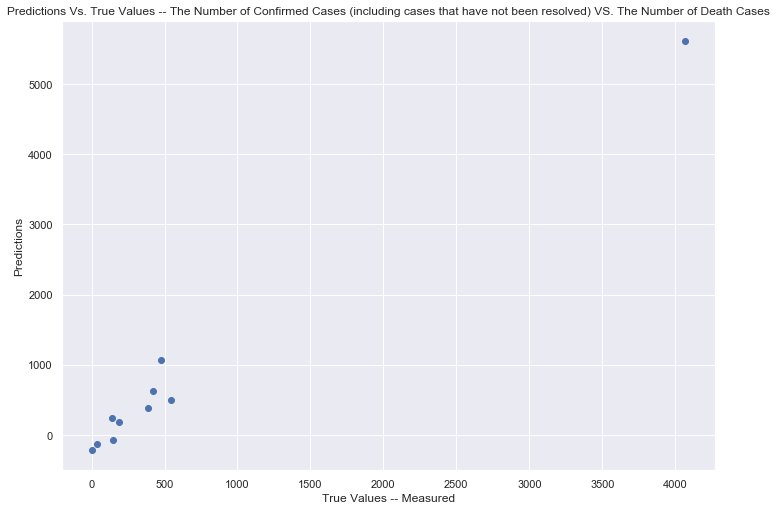

In [43]:
x = states_4_18_dropped_recovered[['Testing_Rate', 'Confirmed']].to_numpy()

y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

plt.scatter(y_test, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- The Number of Confirmed Cases (including cases that have not been resolved) VS. The Number of Death Cases')

r_sq = model.score(x_test, y_test)

print('coefficient of determination:', r_sq)


# Linear Regression and Multiple LR with K-Folds Cross Validation
# Side by side comparision 
### (including failed models)

## run cells above if error shows "['Province_State' 'Country_Region'] not found in axis"

## First using K-Folds CV on Simple Linear Regression
### The Number of Active Cases VS.  The Number of People Hospitalized

In [44]:

states_4_18_dropped_recovered = states_4_18_dropped_recovered.drop(columns=['Province_State', 'Country_Region'])

from sklearn.model_selection import KFold 


x = states_4_18_dropped_recovered.Confirmed.values.reshape(-1,1)

y = states_4_18_dropped_recovered.People_Hospitalized

kf = KFold(n_splits=6) 
kf.get_n_splits(x) 


for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], y[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

from sklearn.model_selection import cross_val_predict
from sklearn import metrics    



/Users/anniepang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [45]:
states_4_18_dropped_recovered.head()

,Confirmed,Deaths,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,4712,153,100.492717,42538.0,620.0,3.247029,907.206961,13.157895
1,314,9,52.530410,9655.0,39.0,2.866242,1615.226458,12.420382
3,4724,180,64.901548,51045.0,566.0,3.810330,701.291175,11.981372
4,1744,38,67.361213,24141.0,291.0,2.178899,932.435235,16.685780
5,30491,1140,77.766063,251614.0,4892.0,3.738808,641.731334,16.044079


R squared:  0.7499837833347791


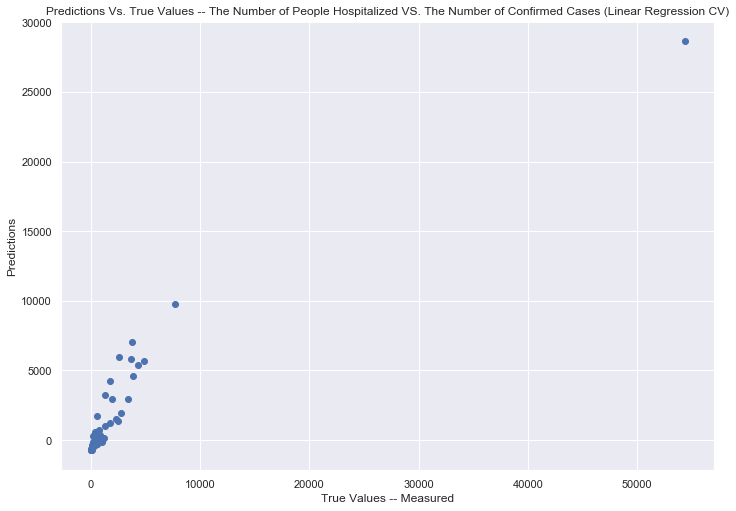

In [46]:




predictions = cross_val_predict(model, x, y, cv=13)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- The Number of People Hospitalized VS. The Number of Confirmed Cases (Linear Regression CV)')
accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)

/Users/anniepang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


R squared:  0.8577513334975149


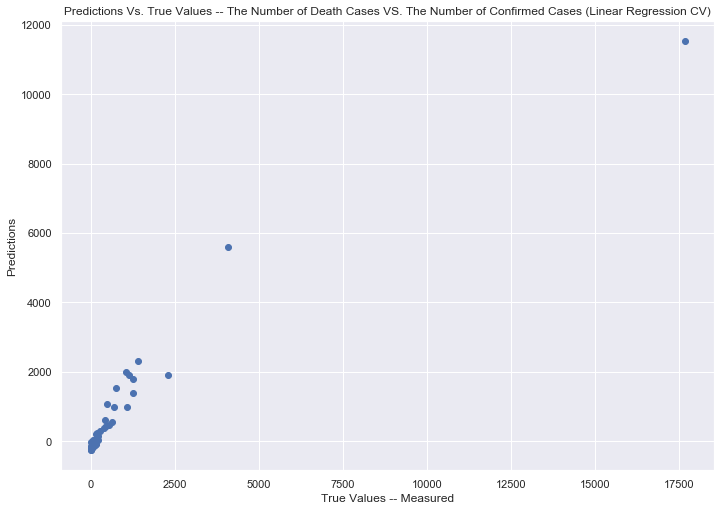

In [47]:


from sklearn.model_selection import KFold 


x = states_4_18_dropped_recovered.Confirmed.values.reshape(-1,1)

y = states_4_18_dropped_recovered.Deaths

kf = KFold(n_splits=6)
kf.get_n_splits(x)

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], y[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

from sklearn.model_selection import cross_val_predict
from sklearn import metrics  


predictions = cross_val_predict(model, x, y, cv=10)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- The Number of Death Cases VS. The Number of Confirmed Cases (Linear Regression CV)')

accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)

/Users/anniepang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


0.2448052588255254


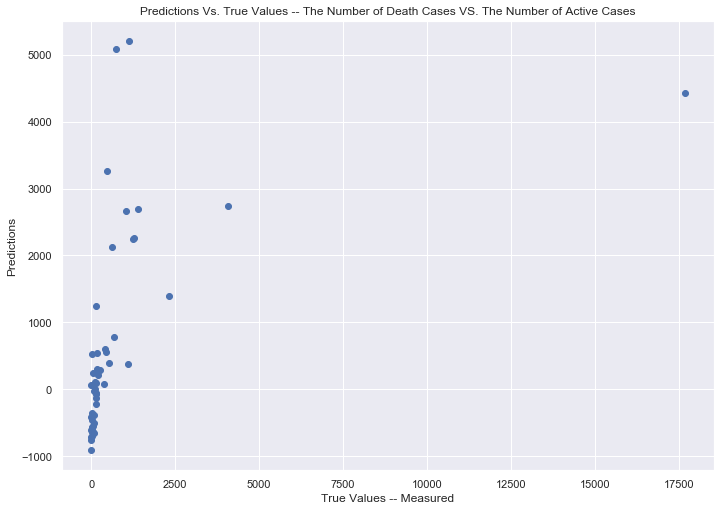

In [48]:


from sklearn.model_selection import KFold 


x = states_4_18_dropped_recovered.People_Tested.values.reshape(-1,1)



kf = KFold(n_splits=6) 
kf.get_n_splits(x) 


for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], y[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

from sklearn.model_selection import cross_val_predict
from sklearn import metrics  



predictions = cross_val_predict(model, x, y, cv=10)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- The Number of Death Cases VS. The Number of Active Cases')

accuracy = metrics.r2_score(y, predictions)
print(accuracy)


# LR VS. K-FOLD

##W People Hospitalized VS. Death Cases

coefficient of determination: 0.8022242197415692


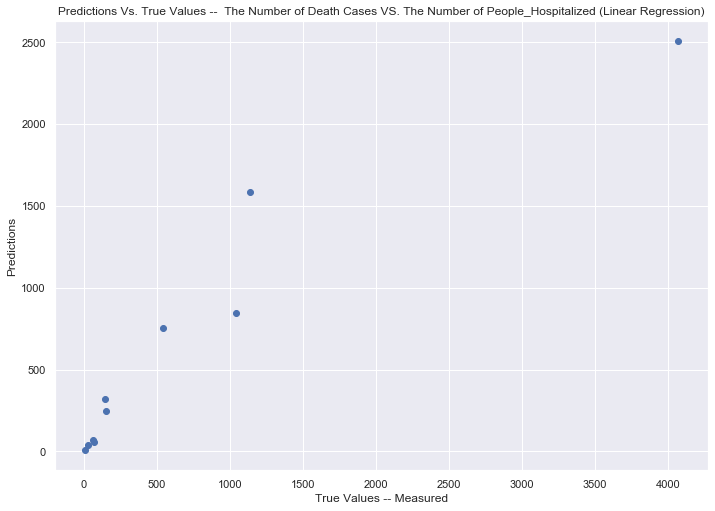

In [49]:

x = states_4_18_dropped_recovered.People_Hospitalized.values.reshape(-1,1)

y = states_4_18_dropped_recovered.Deaths

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()



lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

plt.scatter(y_test, predictions)

plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values --  The Number of Death Cases VS. The Number of People_Hospitalized (Linear Regression)')

r_sq = model.score(x_test, y_test)

print('coefficient of determination:', r_sq)


/Users/anniepang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


R squared:  0.9293842423444972


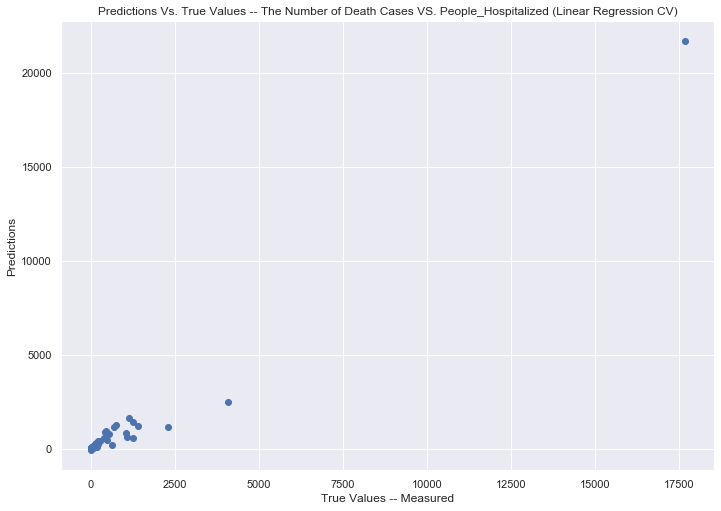

In [50]:


from sklearn.model_selection import KFold 


x = states_4_18_dropped_recovered.People_Hospitalized.values.reshape(-1,1)

y = states_4_18_dropped_recovered.Deaths

kf = KFold(n_splits=6)
kf.get_n_splits(x)


for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], y[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

from sklearn.model_selection import cross_val_predict
from sklearn import metrics  





predictions = cross_val_predict(model, x, y, cv=10)



plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- The Number of Death Cases VS. People_Hospitalized (Linear Regression CV)')

accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)

### Deaths VS. People_Hospitalized + Testing_Rate 

coefficient of determination: 0.9198735343743025


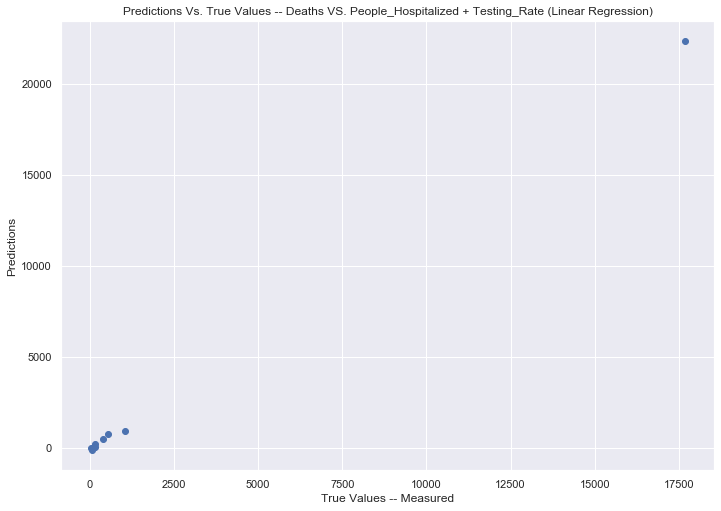

In [51]:

x = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate']].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1) # Create another array

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()


lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)


plt.scatter(y_test, predictions)

plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- Deaths VS. People_Hospitalized + Testing_Rate (Linear Regression)')

r_sq = model.score(x_test, y_test)

print('coefficient of determination:', r_sq)


In [52]:

states_4_18_dropped_recovered.head()

,Confirmed,Deaths,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,4712,153,100.492717,42538.0,620.0,3.247029,907.206961,13.157895
1,314,9,52.530410,9655.0,39.0,2.866242,1615.226458,12.420382
3,4724,180,64.901548,51045.0,566.0,3.810330,701.291175,11.981372
4,1744,38,67.361213,24141.0,291.0,2.178899,932.435235,16.685780
5,30491,1140,77.766063,251614.0,4892.0,3.738808,641.731334,16.044079


# Best Model We Picked!!!

R squared:  0.9828167710015301


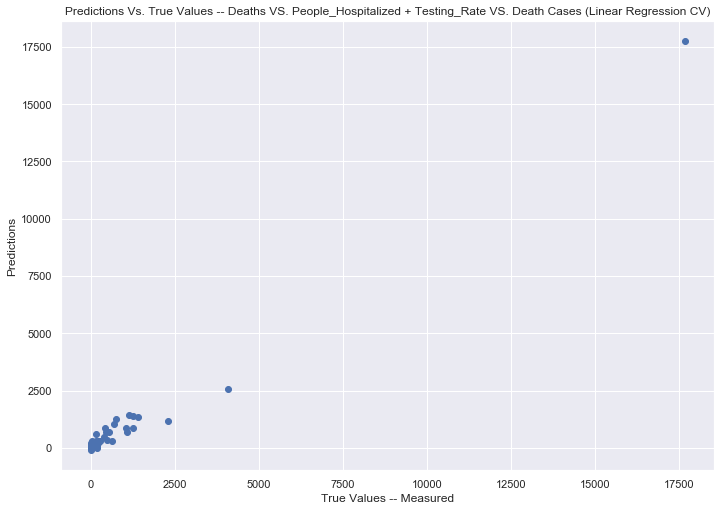

In [53]:
from sklearn.model_selection import KFold 
X = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate']].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1)
kf = KFold(n_splits=2)  
kf.get_n_splits(X) 

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- Deaths VS. People_Hospitalized + Testing_Rate VS. Death Cases (Linear Regression CV)')



accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)



### Deaths VS. People_Hospitalized + Testing_Rate + Confirmed 

coefficient of determination: 0.830620209581985
mean_squared_error:  291.3679694335977


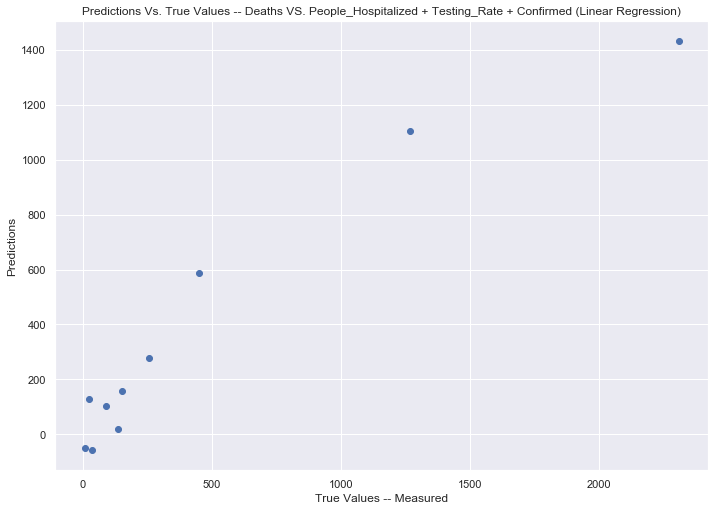

In [54]:


x = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate', 'Confirmed']].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1) 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)


plt.scatter(y_test, predictions)

plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- Deaths VS. People_Hospitalized + Testing_Rate + Confirmed (Linear Regression)')

r_sq = model.score(x_test, y_test)

print('coefficient of determination:', r_sq)
print('mean_squared_error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


R squared:  0.8518824456472486


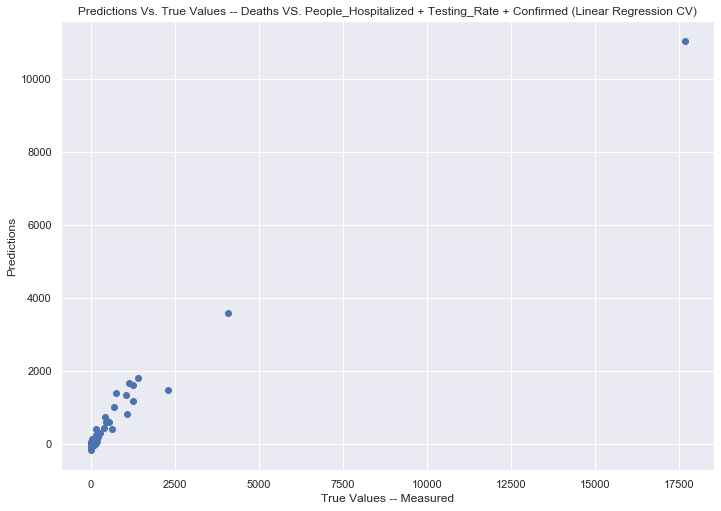

In [55]:



from sklearn.model_selection import KFold 
X = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate', 'Confirmed']].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1) 
kf = KFold(n_splits=2) 
kf.get_n_splits(X) 
 

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- Deaths VS. People_Hospitalized + Testing_Rate + Confirmed (Linear Regression CV)')



accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)


### Deaths VS. People_Hospitalized + Testing_Rate + Confirmed + Incident_Rate

coefficient of determination: 0.8161300262153461


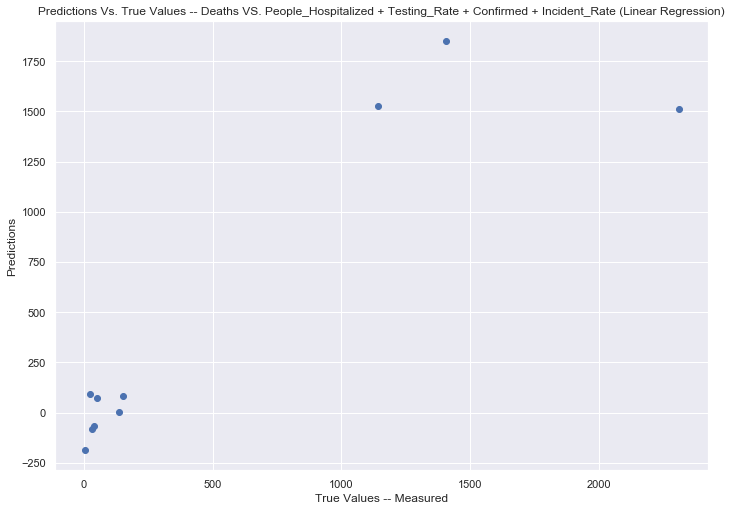

In [56]:


x = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate', 'Confirmed', 'Incident_Rate']].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1) 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

plt.scatter(y_test, predictions)

plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- Deaths VS. People_Hospitalized + Testing_Rate + Confirmed + Incident_Rate (Linear Regression)')

r_sq = model.score(x_test, y_test)

print('coefficient of determination:', r_sq)


R squared:  0.825600843710541


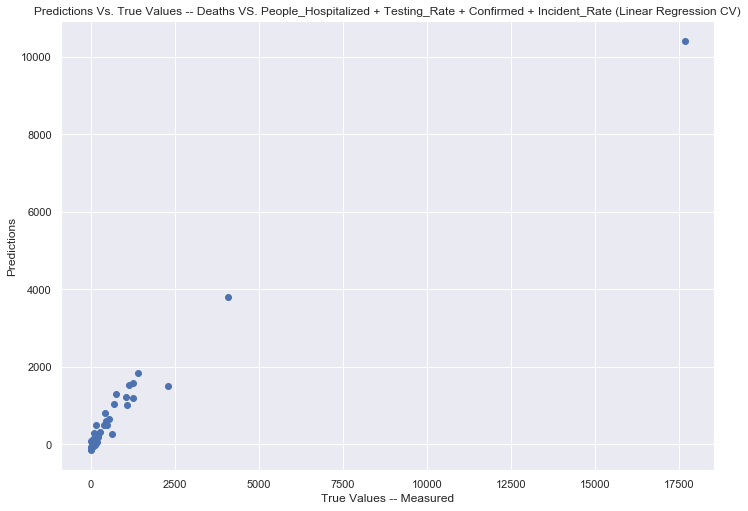

In [57]:



from sklearn.model_selection import KFold 
X = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate', 'Confirmed', 'Incident_Rate',
       ]].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1) 
kf = KFold(n_splits=2) 
kf.get_n_splits(X)
 

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- Deaths VS. People_Hospitalized + Testing_Rate + Confirmed + Incident_Rate (Linear Regression CV)')



accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)

## People_Hospitalized + Testing_Rate + Confirmed + Incident_Rate + People_Tested VS. Deaths

coefficient of determination: 0.9388397624180519


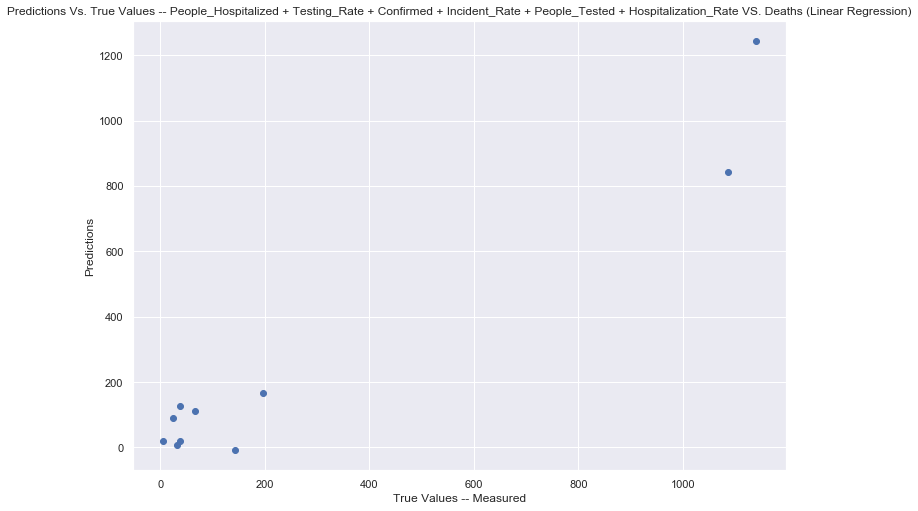

In [58]:

x = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate', 'Confirmed', 'Incident_Rate', 'Hospitalization_Rate',
       'People_Tested']].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1) 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

plt.scatter(y_test, predictions)

plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- People_Hospitalized + Testing_Rate + Confirmed + Incident_Rate + People_Tested + Hospitalization_Rate VS. Deaths (Linear Regression)')

r_sq = model.score(x_test, y_test)

print('coefficient of determination:', r_sq)


R squared:  0.9042782219912721


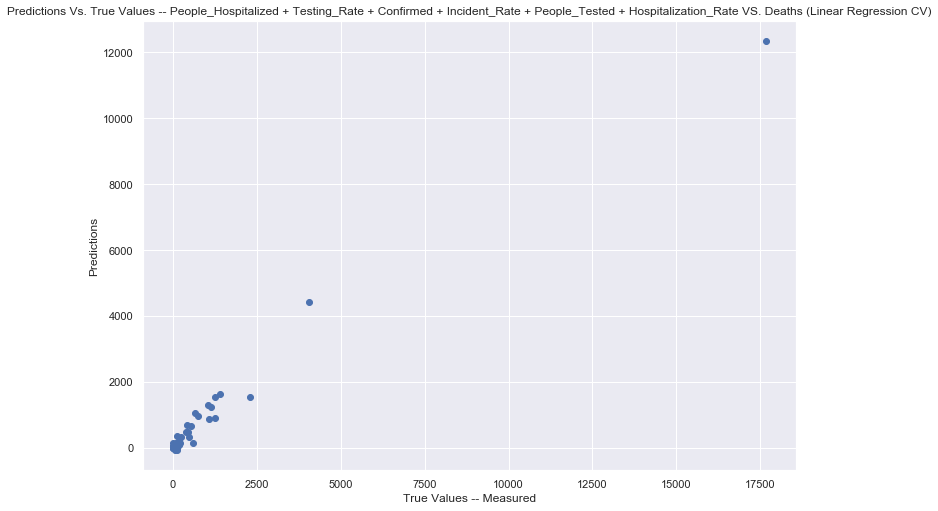

In [59]:



from sklearn.model_selection import KFold 
X = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate', 'Confirmed', 'Incident_Rate', 'Hospitalization_Rate',
       'People_Tested'
       ]].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1)
kf = KFold(n_splits=2)  
kf.get_n_splits(X) 
 

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- People_Hospitalized + Testing_Rate + Confirmed + Incident_Rate + People_Tested + Hospitalization_Rate VS. Deaths (Linear Regression CV)')



accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)

## People_Hospitalized + Testing_Rate + Confirmed + Incident_Rate + People_Tested + Mortality_Rate VS. Deaths

coefficient of determination: 0.8977162551659172


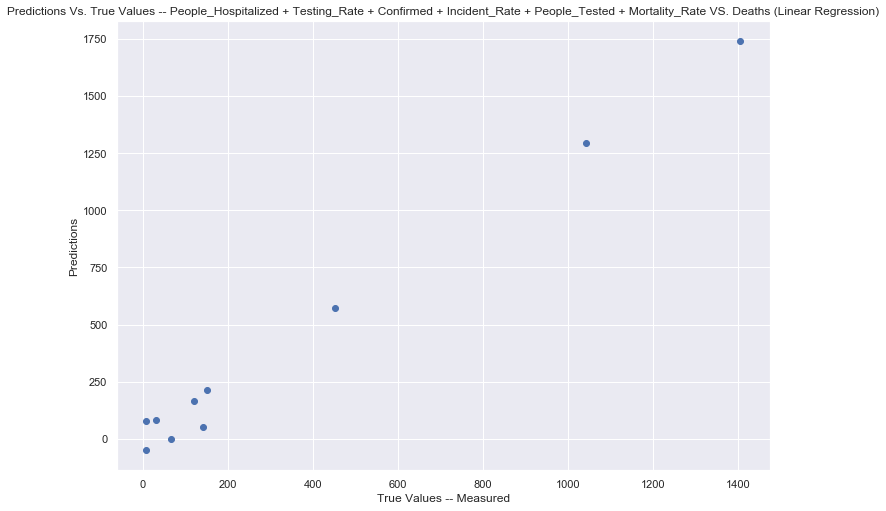

In [60]:


x = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate', 'Confirmed', 'Incident_Rate', 'Testing_Rate', 
       'People_Tested', 'Mortality_Rate']].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

plt.scatter(y_test, predictions)

plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- People_Hospitalized + Testing_Rate + Confirmed + Incident_Rate + People_Tested + Mortality_Rate VS. Deaths (Linear Regression)')

r_sq = model.score(x_test, y_test)

print('coefficient of determination:', r_sq)


R squared:  0.8821151395672439


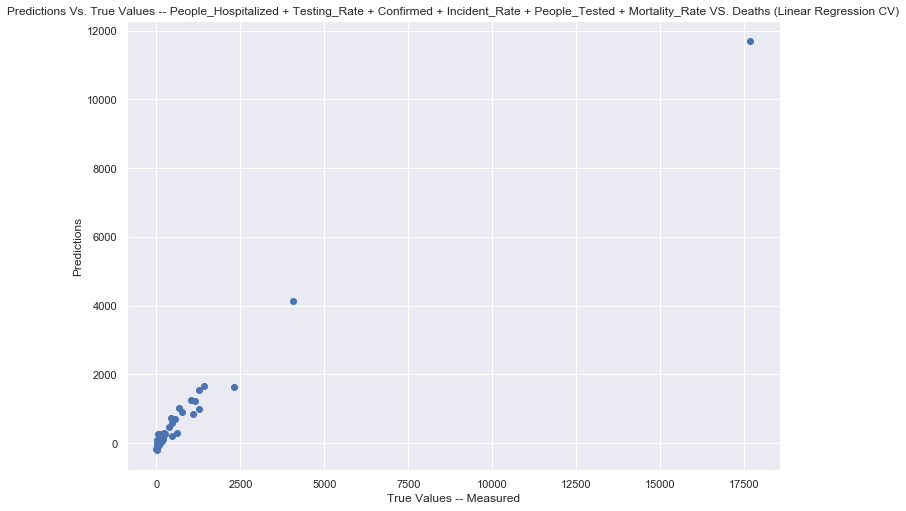

In [61]:



from sklearn.model_selection import KFold
X = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate', 'Confirmed', 'Incident_Rate', 'Testing_Rate', 
       'People_Tested', 'Mortality_Rate'
       ]].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1)
kf = KFold(n_splits=2)
kf.get_n_splits(X) 


for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- People_Hospitalized + Testing_Rate + Confirmed + Incident_Rate + People_Tested + Mortality_Rate VS. Deaths (Linear Regression CV)')



accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)

## People_Hospitalized + Confirmed + People_Tested VS. Deaths

R squared:  0.919046132443436


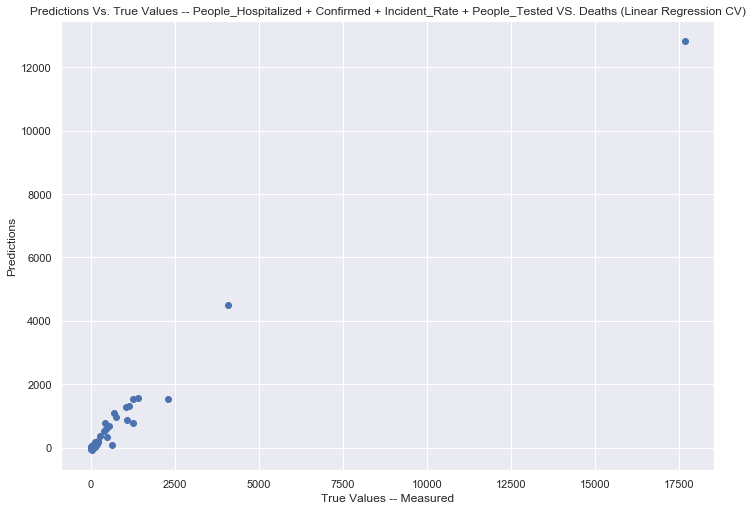

In [62]:



from sklearn.model_selection import KFold 
X = states_4_18_dropped_recovered[['People_Hospitalized', 'Confirmed',  
       'People_Tested'
       ]].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1)
kf = KFold(n_splits=2) 
kf.get_n_splits(X) 


for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- People_Hospitalized + Confirmed + Incident_Rate + People_Tested VS. Deaths (Linear Regression CV)')



accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)

/Users/anniepang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


R squared:  0.8314676531506887


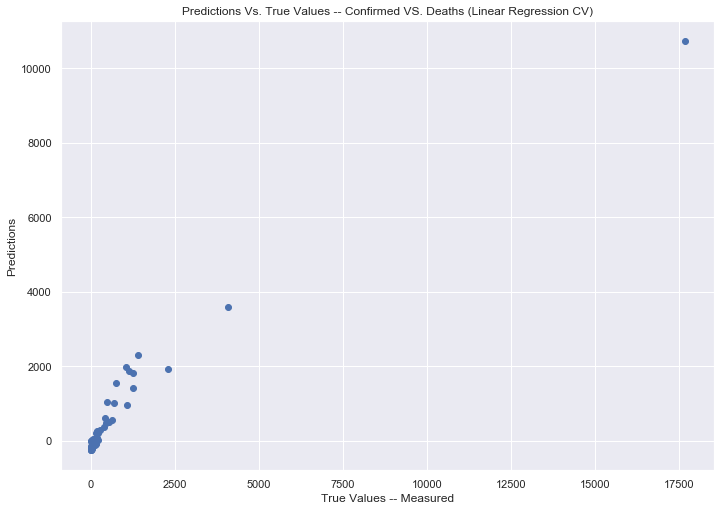

In [63]:



from sklearn.model_selection import KFold 
X = states_4_18_dropped_recovered.Confirmed.values.reshape(-1,1)
y = states_4_18_dropped_recovered.Deaths 
kf = KFold(n_splits=2) 
kf.get_n_splits(X) 


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- Confirmed VS. Deaths (Linear Regression CV)')



accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)

## People_Hospitalized + People_Tested VS. Deaths

R squared:  0.9612995258526552


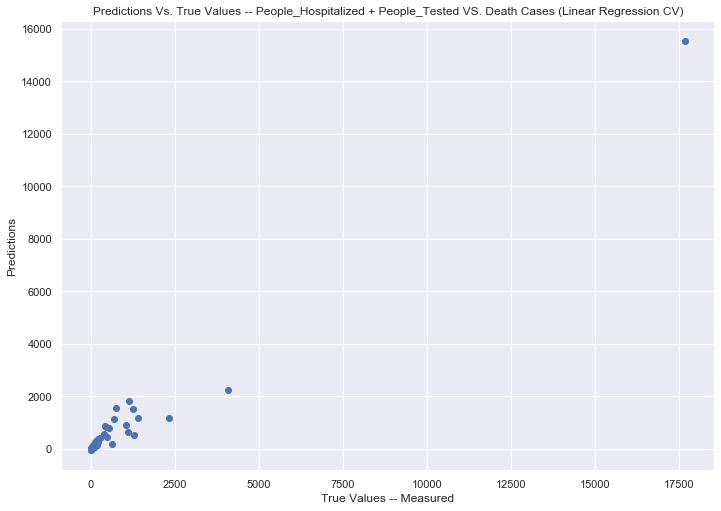

In [64]:
from sklearn.model_selection import KFold
X = states_4_18_dropped_recovered[['People_Hospitalized', 'People_Tested']].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1)
kf = KFold(n_splits=2)
kf.get_n_splits(X)


for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]



predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- People_Hospitalized + People_Tested VS. Death Cases (Linear Regression CV)')



accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)



# Hypothesis Testing for all the factors VS. the mortality rate 

In [65]:

import seaborn as sns
%matplotlib inline

In [66]:

feature_cols = ["Testing_Rate", "Hospitalization_Rate", "Incident_Rate", "People_Tested", "People_Hospitalized", "Confirmed", "Deaths", 'Active']

X = with_active_df[feature_cols]


with_active_df = with_active_df.fillna(with_active_df.mean())


In [67]:

y = with_active_df['Mortality_Rate']
y.head()

0    3.247029
1    2.866242
3    3.810330
4    2.178899
5    3.738808
Name: Mortality_Rate, dtype: float64

In [68]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [69]:

from sklearn.linear_model import LinearRegression


linreg = LinearRegression()

linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:

print(linreg.intercept_)
print(linreg.coef_)

2.5167558324491144
[-7.60744264e-04  7.35741624e-02  5.02646781e-03  5.89014919e-06
 -1.57487676e-04  1.13974675e-03  2.43694463e-03 -1.29719788e-03]


In [71]:

zip(feature_cols, linreg.coef_)

In [72]:

y_pred = linreg.predict(X_test)

In [73]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

7.829995276111618


In [74]:

import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
%matplotlib inline

/Users/anniepang/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


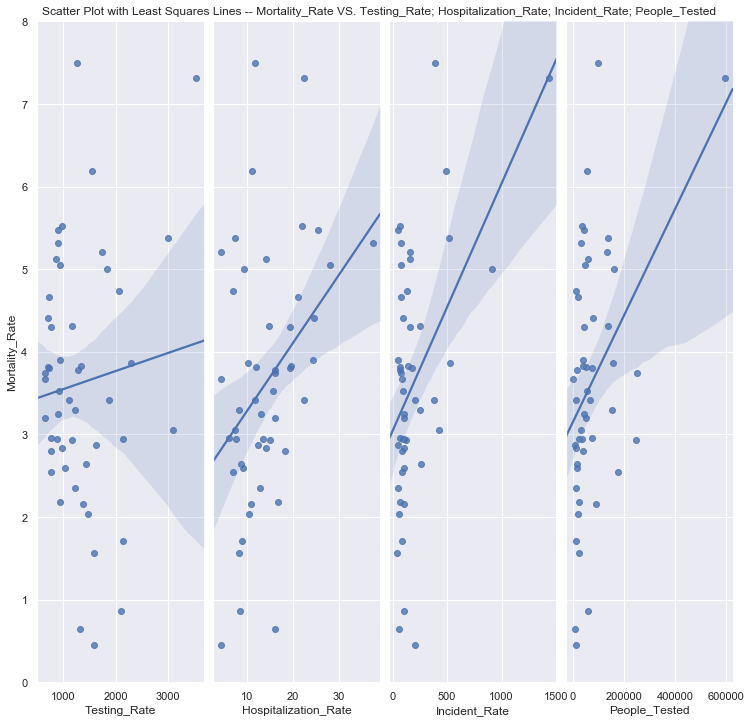

In [75]:

g = sns.pairplot(with_active_df, x_vars = ["Testing_Rate", "Hospitalization_Rate", "Incident_Rate", "People_Tested"],
             y_vars='Mortality_Rate', size=10, aspect=0.7, kind='reg')


g.fig.suptitle("Scatter Plot with Least Squares Lines -- Mortality_Rate VS. Testing_Rate; Hospitalization_Rate; Incident_Rate; People_Tested", y=1)



g.fig.set_size_inches(10,10)

g.set(ylim=(0,8))
#g.set(xlim=(0,12000))



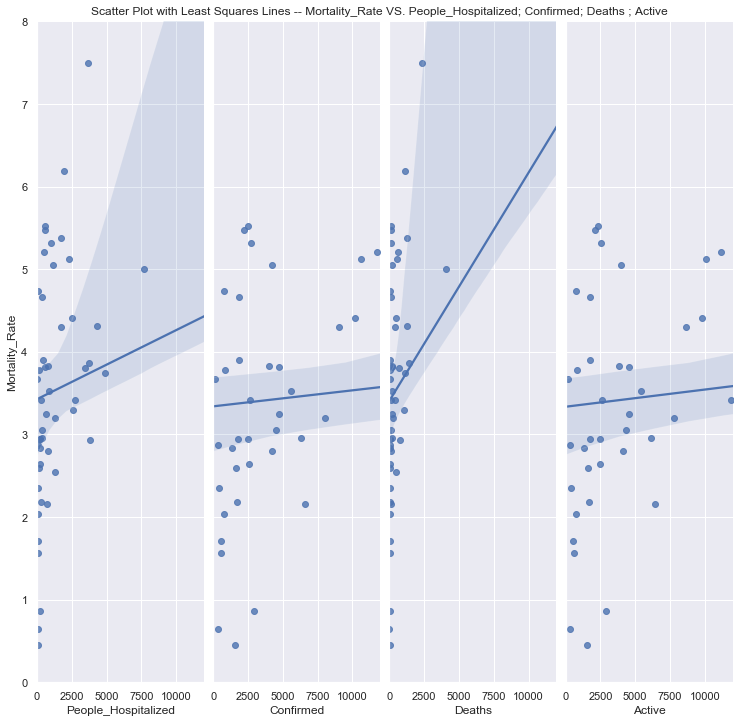

In [76]:

g = sns.pairplot(with_active_df, x_vars = ["People_Hospitalized", "Confirmed", "Deaths", 'Active'],
             y_vars='Mortality_Rate', size=10, aspect=0.7, kind='reg')
g.fig.suptitle("Scatter Plot with Least Squares Lines -- Mortality_Rate VS. People_Hospitalized; Confirmed; Deaths ; Active", y=1)
    
g.fig.set_size_inches(10,10)
g.set(ylim=(0,8))
g.set(xlim=(0,12000))

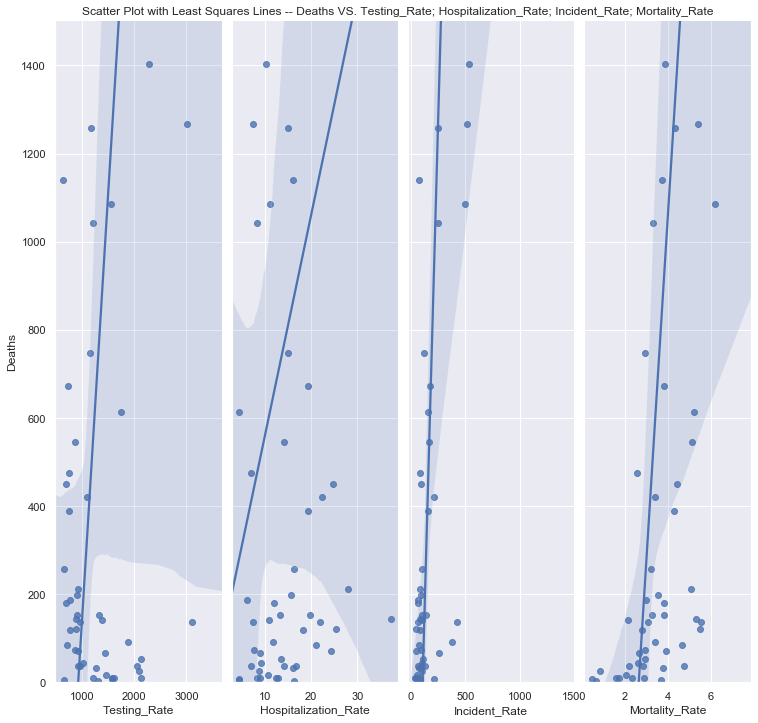

In [77]:

g = sns.pairplot(with_active_df, x_vars = ["Testing_Rate", "Hospitalization_Rate", "Incident_Rate", "Mortality_Rate"],
             y_vars='Deaths', size=10, aspect=0.7, kind='reg')

g.fig.suptitle("Scatter Plot with Least Squares Lines -- Deaths VS. Testing_Rate; Hospitalization_Rate; Incident_Rate; Mortality_Rate", y=1)


g.fig.set_size_inches(10,10)
g.set(ylim=(0,1500))
#g.set(xlim=(0,12000))



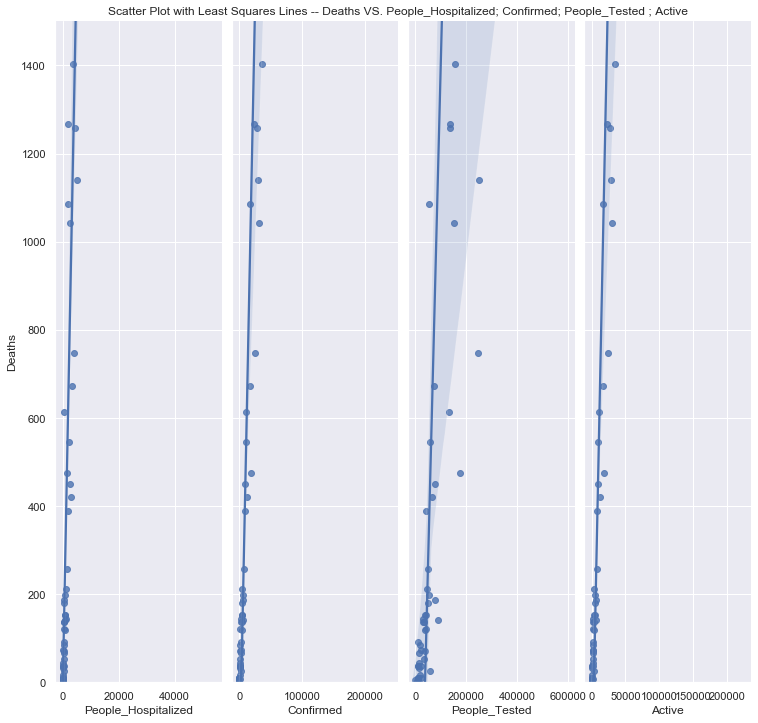

In [78]:


g = sns.pairplot(with_active_df, x_vars = ["People_Hospitalized", "Confirmed", "People_Tested", 'Active' ],
             y_vars='Deaths', size=10, aspect=0.7, kind='reg')

g.fig.suptitle("Scatter Plot with Least Squares Lines -- Deaths VS. People_Hospitalized; Confirmed; People_Tested ; Active", y = 1)

g.fig.set_size_inches(10,10)
g.set(ylim=(0,1500))
#g.set(xlim=(0,40000))

In [79]:

# !!!!! sklearn VS. statsmodels --> pretty different result


#statsmodels

lm1 = smf.ols(formula='Mortality_Rate ~ Active + People_Hospitalized + Confirmed + Deaths + Testing_Rate + Hospitalization_Rate + Incident_Rate + People_Tested', data=with_active_df).fit()
lm1.params

print(lm1.params)

Intercept               2.103214
Active                 -0.001378
People_Hospitalized    -0.000674
Confirmed               0.001178
Deaths                  0.002556
Testing_Rate           -0.001028
Hospitalization_Rate    0.106833
Incident_Rate           0.007220
People_Tested           0.000020
dtype: float64


In [80]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     11.98
Date:                Fri, 15 May 2020   Prob (F-statistic):           2.79e-08
Time:                        17:22:09   Log-Likelihood:                -63.573
No. Observations:                  50   AIC:                             143.1
Df Residuals:                      42   BIC:                             158.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.1032      0.608      3.461      0.001       0.877       3.330
Active                  -0.0014      0.000     -5.065      0.000      -0.002      -0.001
People_Hospitalized     -0.0007      0.000     -3.729      0.001      -0.001      -0.000
Confirmed                0.0012      0.000      4.884      0.000       0.001       0.002
Deaths                   0.0026      0.001      4.995      0.000       0.002       0.004
Testing_Rate            -0.0010      0.000     -2.954      0.005      -0.002      -0.000
Hospitalization_Rate     0.1068      0.024      4.423      0.000       0.058       0.156
Incident_Rate            0.0072      0.002      3.418      0.001       0.003       0.011
People_Tested          1.98e-05    4.9e-06      4.043      0.000    9.92e-06    2.97e-05
==============================================================================
Omnibus:                        5.760   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                7.190
Skew:                           0.248   Prob(JB):                       0.0275
Kurtosis:                       4.790   Cond. No.                     6.97e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The number of confirmed, deaths case, and incident rate have slightly positive associations with the mortality rate.
Comparing to these associations, the hopitalization rate has a relatively strong association with the mortality rate.

The number of people hospitaized, active cases, testing rate 
have slightly negative associations with the mortality rate.

As testing rate increases, mortality decreases. This reflects that the current method of identifying disease carriers
is effective. 

As the number of people hospitaized increases, mortality decreases. This shows that social distancing (enforced by most of the state governments) is effective to protecting people 
decrease the spreading spead of COVID-19. 

As the number of active cases increases, mortality decreases. Since we can get the number of active cases by subtracting
the number of recovered and death cases from the number of confirmed cases, it is safe to make the assumption that
the number of recovered cases slowly increases. 

However, it is noticable that all the negative associations are reletively small. It is not yet same to make the assumption that the guidelines enforced by the government and the CDC is sifnificantly efficient. There is still a significant part of US population who are severely sick, reflecting from the coefficient of hospitalization rate is around 0.1068, much more significant than the other coefficients. With the coefficient of incident rate (confirmed cases per 100,000 persons) of 0.0072 tailing behind, it is evident that the US medicial system faces enormous challenges. 


# Decision Tree Regression

In [81]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.linear_model import LinearRegression


from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.model_selection import cross_val_predict
from sklearn import metrics   



from sklearn.model_selection import train_test_split

## The best model Deaths VS. People_Hospitalized + Testing_Rate does not apply to Decision Tree Regression CV

R squared:  0.9828167710015301


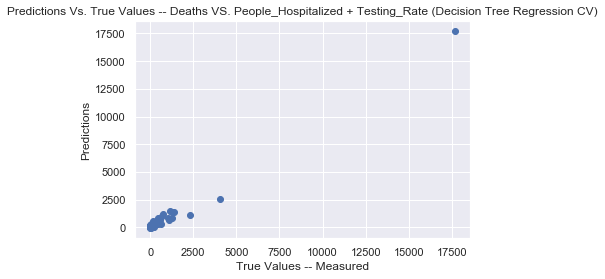

In [82]:
from sklearn.model_selection import KFold
X = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate']].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1) 
kf = KFold(n_splits=2)  
kf.get_n_splits(X) 


for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    
from sklearn.tree import DecisionTreeRegressor

lm = DecisionTreeRegressor()
    

from sklearn.model_selection import cross_val_predict
from sklearn import metrics 



predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- Deaths VS. People_Hospitalized + Testing_Rate (Decision Tree Regression CV)')



accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)    


R squared:  0.9121218157609896


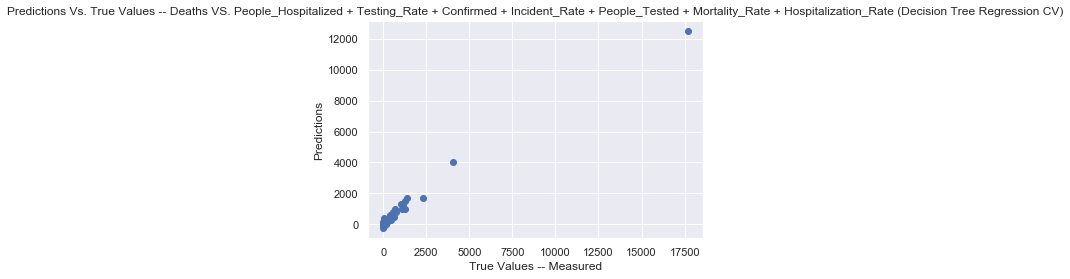

In [83]:
from sklearn.model_selection import KFold 
X = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate', 'Confirmed', 'Incident_Rate',
       'People_Tested', 'Mortality_Rate', 'Hospitalization_Rate']].to_numpy()
y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1) 
kf = KFold(n_splits=2) 
kf.get_n_splits(X)


for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    
from sklearn.tree import DecisionTreeRegressor

lm = DecisionTreeRegressor()

    

from sklearn.model_selection import cross_val_predict
from sklearn import metrics 



predictions = cross_val_predict(model, X, y, cv=16)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- Deaths VS. People_Hospitalized + Testing_Rate + Confirmed + Incident_Rate + People_Tested + Mortality_Rate + Hospitalization_Rate (Decision Tree Regression CV)')



accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)    


/Users/anniepang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


R squared:  0.0451570437362383


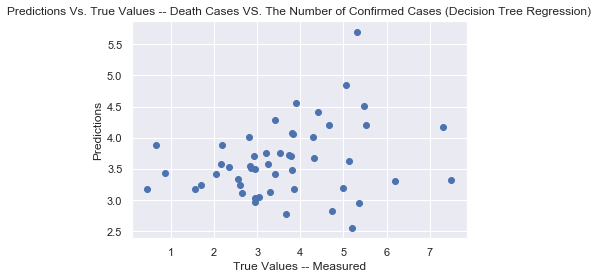

In [84]:

from sklearn.model_selection import KFold 


x = states_4_18_dropped_recovered.Hospitalization_Rate.values.reshape(-1,1)

y = states_4_18_dropped_recovered.Mortality_Rate


kf = KFold(n_splits=6) 
kf.get_n_splits(x) 


for train_index, test_index in kf.split(x):

    X_train, X_test = x[train_index], y[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
from sklearn.tree import DecisionTreeRegressor

lm = DecisionTreeRegressor()

    

from sklearn.model_selection import cross_val_predict
from sklearn import metrics  


predictions = cross_val_predict(model, x, y, cv=13)
plt.scatter(y, predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- Death Cases VS. The Number of Confirmed Cases (Decision Tree Regression)')

accuracy = metrics.r2_score(y, predictions)
print('R squared: ', accuracy)

R squared:  0.09539619258560761


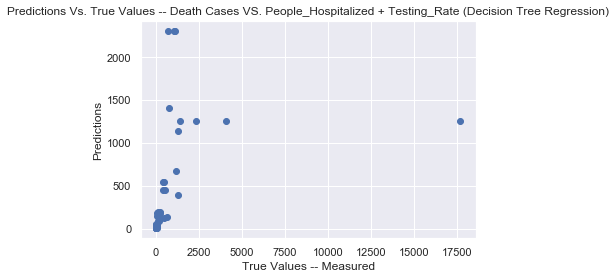

In [85]:

x = states_4_18_dropped_recovered[['People_Hospitalized', 'Testing_Rate']].to_numpy()

y = states_4_18_dropped_recovered.Deaths.values.reshape(-1,1)



x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.tree import DecisionTreeRegressor

lm = DecisionTreeRegressor()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)
predictions



e_predictions = cross_val_predict(model, x, y, cv=6)

plt.scatter(y, e_predictions)
plt.xlabel('True Values -- Measured')
plt.ylabel('Predictions')
plt.title('Predictions Vs. True Values -- Death Cases VS. People_Hospitalized + Testing_Rate (Decision Tree Regression)')
accuracy = metrics.r2_score(y, e_predictions)
print('R squared: ', accuracy)